In [1]:
# importing liberary
import pymysql
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Establishing connection to the DataBase. 

connection = pymysql.connect(host = "127.0.0.1",
                             user = "root",
                             password = "12345",
                             database = "capstone")
connection

In [3]:
# defining query, executing and reading reasult in dataframe.

query = "select * from crime_data"
df = pd.read_sql(query, connection)
df.head(5)

C:\Users\mdsha\AppData\Local\Temp\ipykernel_10948\1832626888.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


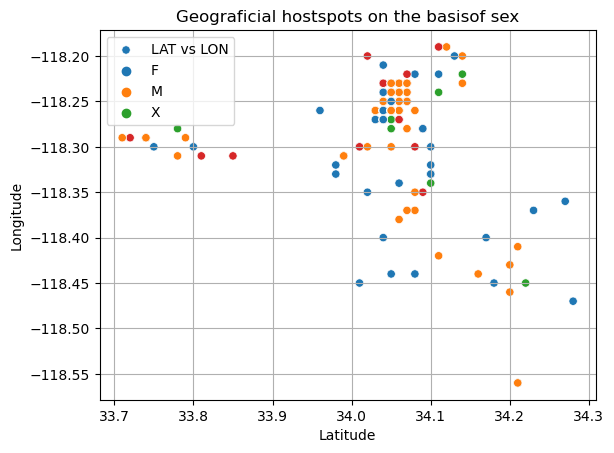

In [4]:
# Where are the geographical hotspots for reported crimes?

sns.scatterplot(x= df["LAT"], y = df["LON"], color="green", label="LAT vs LON", hue = df["Vict_Sex"])

plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.title("Geograficial hostspots on the basisof sex")
plt.grid()

plt.show()

C:\Users\mdsha\AppData\Local\Temp\ipykernel_10948\2237101428.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1= pd.read_sql(query_1, connection)


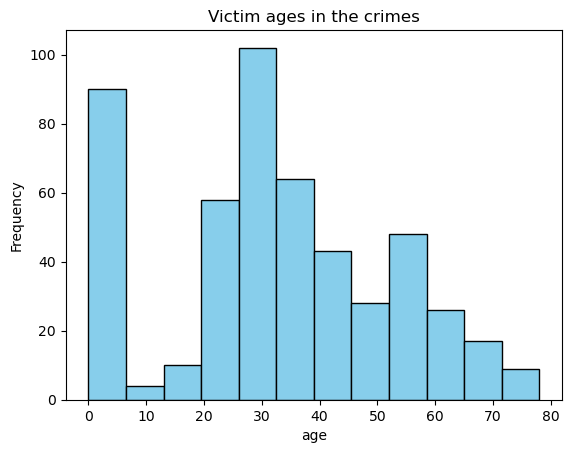

In [5]:
# What is the distribution of victim ages in reported crimes?
query_1= """
select Vict_Age
from crime_data
where Vict_Age is not null
"""
df1= pd.read_sql(query_1, connection)
plt.hist(df1["Vict_Age"], bins=12, color = "skyblue", edgecolor= "black")
plt.title("Victim ages in the crimes")
plt.xlabel('age')
plt.ylabel("Frequency")
plt.show()

C:\Users\mdsha\AppData\Local\Temp\ipykernel_10948\898646526.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1= pd.read_sql(query_1, connection)


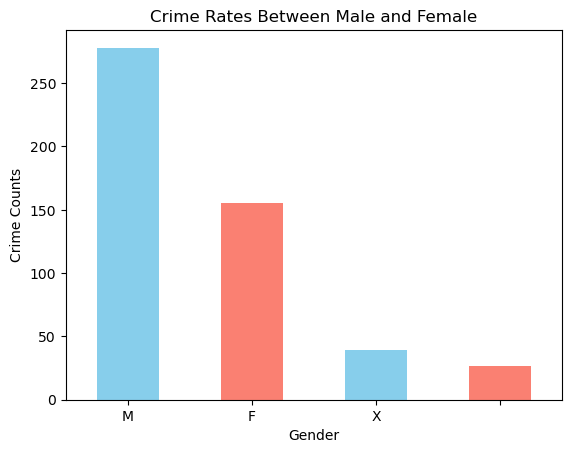

In [6]:
#  Is there a significant difference in crime rates between male and female victims?
query_1= """
select Vict_Sex
from crime_data
where Vict_Sex is not null
"""
df1= pd.read_sql(query_1, connection)

crime_counts = df1["Vict_Sex"].value_counts()
crime_counts.plot(kind = 'bar', color = ['skyblue', 'salmon'])
plt.title("Crime Rates Between Male and Female")
plt.xlabel('Gender')
plt.ylabel('Crime Counts')
plt.xticks(rotation = 0)
           
plt.show()

C:\Users\mdsha\AppData\Local\Temp\ipykernel_10948\3576466063.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1= pd.read_sql(query1, connection)


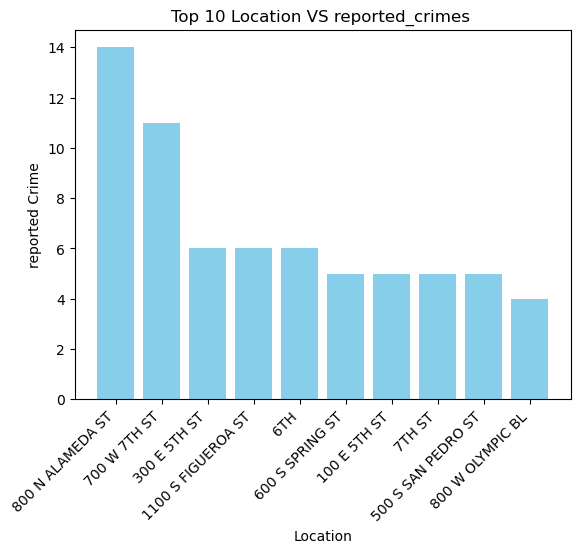

NameError: name 'locationwise_count' is not defined

In [7]:
# Where do most crimes occur based on the "Location" column? 


query1 = """
select Location, count(*) as num_crimes
from crime_data
group by Location
order by num_crimes desc
limit 10 
"""

df1= pd.read_sql(query1, connection)

plt.bar(df1['Location'], df1['num_crimes'], color = 'skyblue')
plt.title("Top 10 Location VS reported_crimes ")
plt.xlabel('Location')
plt.ylabel('reported Crime')
plt.xticks(rotation = 45, ha ='right')
plt.show()

df1["Location"].value_counts()
locationwise_count

C:\Users\mdsha\AppData\Local\Temp\ipykernel_10948\430039032.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2= pd.read_sql(query2, connection)


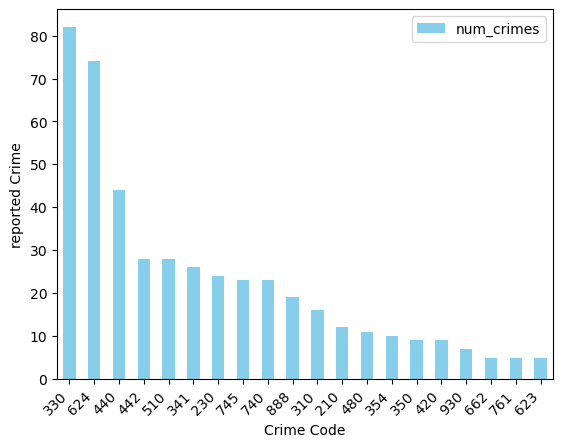

In [8]:
# What is the distribution of reported crimes based on Crime Code?

query2= """
select Crm_Cd, count(*) as num_crimes
from crime_data
group by Crm_Cd
order by num_crimes desc
limit 20 
"""
df2= pd.read_sql(query2, connection)
df2.plot(x = 'Crm_Cd', y = 'num_crimes', kind = 'bar', color = 'skyblue')
plt.xlabel('Crime Code')
plt.ylabel('reported Crime')
plt.xticks(rotation = 45, ha ='right')
plt.show()

